In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
import numpy as np

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Macbeth - Full Text

#### Import using Folger Shakespeare Library's API

In [4]:
url = 'https://www.folgerdigitaltexts.org/Mac/text'

In [5]:
response = requests.get(url)

In [6]:
response.text

'<br/>\nWhen shall we three meet again?<br/>\nIn thunder, lightning, or in rain?<br/>\nWhen the hurly-burly’s done,<br/>\nWhen the battle’s lost and won.<br/>\nThat will be ere the set of sun.<br/>\nWhere the place?<br/>\nUpon the heath.<br/>\nThere to meet with Macbeth.<br/>\nI come, Graymalkin.<br/>\nPaddock calls.<br/>\nAnon.<br/>\nFair is foul, and foul is fair;<br/>\nHover through the fog and filthy air.<br/>\nWhat bloody man is that? He can report,<br/>\nAs seemeth by his plight, of the revolt<br/>\nThe newest state.<br/>\nThis is the sergeant<br/>\nWho, like a good and hardy soldier, fought<br/>\n’Gainst my captivity.—Hail, brave friend!<br/>\nSay to the King the knowledge of the broil<br/>\nAs thou didst leave it.<br/>\nDoubtful it stood,<br/>\nAs two spent swimmers that do cling together<br/>\nAnd choke their art. The merciless Macdonwald<br/>\n(Worthy to be a rebel, for to that<br/>\nThe multiplying villainies of nature<br/>\nDo swarm upon him) from the Western Isles<br/>\nOf

In [7]:
macbeth_soup = BS(response.text, "html.parser")

In [8]:
macbeth_soup

<br/>
When shall we three meet again?<br/>
In thunder, lightning, or in rain?<br/>
When the hurly-burly’s done,<br/>
When the battle’s lost and won.<br/>
That will be ere the set of sun.<br/>
Where the place?<br/>
Upon the heath.<br/>
There to meet with Macbeth.<br/>
I come, Graymalkin.<br/>
Paddock calls.<br/>
Anon.<br/>
Fair is foul, and foul is fair;<br/>
Hover through the fog and filthy air.<br/>
What bloody man is that? He can report,<br/>
As seemeth by his plight, of the revolt<br/>
The newest state.<br/>
This is the sergeant<br/>
Who, like a good and hardy soldier, fought<br/>
’Gainst my captivity.—Hail, brave friend!<br/>
Say to the King the knowledge of the broil<br/>
As thou didst leave it.<br/>
Doubtful it stood,<br/>
As two spent swimmers that do cling together<br/>
And choke their art. The merciless Macdonwald<br/>
(Worthy to be a rebel, for to that<br/>
The multiplying villainies of nature<br/>
Do swarm upon him) from the Western Isles<br/>
Of kerns and gallowglasses is s

In [9]:
macbeth_full_text = macbeth_soup.get_text()

In [10]:
macbeth_full_text = macbeth_full_text.splitlines()

In [11]:
macbeth_full_text = [line.strip() for line in macbeth_full_text if line.strip()]

In [12]:
macbeth_full_text

['When shall we three meet again?',
 'In thunder, lightning, or in rain?',
 'When the hurly-burly’s done,',
 'When the battle’s lost and won.',
 'That will be ere the set of sun.',
 'Where the place?',
 'Upon the heath.',
 'There to meet with Macbeth.',
 'I come, Graymalkin.',
 'Paddock calls.',
 'Anon.',
 'Fair is foul, and foul is fair;',
 'Hover through the fog and filthy air.',
 'What bloody man is that? He can report,',
 'As seemeth by his plight, of the revolt',
 'The newest state.',
 'This is the sergeant',
 'Who, like a good and hardy soldier, fought',
 '’Gainst my captivity.—Hail, brave friend!',
 'Say to the King the knowledge of the broil',
 'As thou didst leave it.',
 'Doubtful it stood,',
 'As two spent swimmers that do cling together',
 'And choke their art. The merciless Macdonwald',
 '(Worthy to be a rebel, for to that',
 'The multiplying villainies of nature',
 'Do swarm upon him) from the Western Isles',
 'Of kerns and gallowglasses is supplied;',
 'And Fortune, on hi

In [13]:
len(macbeth_full_text)

2453

In [14]:
macbeth_full_text[-10]

'As calling home our exiled friends abroad'

In [15]:
macbeth_full_text_df = pd.DataFrame({
    'line_number': np.arange(1, len(macbeth_full_text)+1, dtype=int),
    'text': macbeth_full_text
})

In [16]:
macbeth_full_text_df

,line_number,text
0,1,When shall we three meet again?
1,2,"In thunder, lightning, or in rain?"
2,3,"When the hurly-burly’s done,"
3,4,When the battle’s lost and won.
4,5,That will be ere the set of sun.
...,...,...
2448,2449,"Took off her life)—this, and what needful else"
2449,2450,"That calls upon us, by the grace of grace,"
2450,2451,"We will perform in measure, time, and place."
2451,2452,"So thanks to all at once and to each one,"


#### Create a list of tuples to provide Act, Scene, Start and End. This maps the play in its entirety to let me know which lines belong to whcih act and scene.

In [17]:
scene_data = [
    ("1", "1", 1, 13),
    ("1", "2", 14, 91),
    ("1", "3", 92, 266),
    ("1", "4", 267, 331),
    ("1", "5", 332, 417),
    ("1", "6", 418, 456),
    ("1", "7", 457, 552),
    ("2", "1", 553, 629),
    ("2", "2", 630, 724),
    ("2", "3", 725, 896),
    ("2", "4", 897, 952),
    ("3", "1", 953, 1114),
    ("3", "2", 1115, 1177),
    ("3", "3", 1178, 1210),
    ("3", "4", 1211, 1386),
    ("3", "5", 1387, 1422),
    ("3", "6", 1423, 1478),
    ("4", "1", 1479, 1655),
    ("4", "2", 1656, 1753),
    ("4", "3", 1754, 2035),
    ("5", "1", 2036, 2119),
    ("5", "2", 2120, 2156),
    ("5", "3", 2157, 2232),
    ("5", "4", 2233, 2259),
    ("5", "5", 2260, 2318),
    ("5", "6", 2319, 2329),
    ("5", "7", 2330, 2365),
    ("5", "8", 2366, 2453)
]

In [18]:
scene_df = pd.DataFrame(scene_data, columns=['act', 'scene', 'start', 'end']).astype(int)

In [19]:
scene_df.head()

,act,scene,start,end
0,1,1,1,13
1,1,2,14,91
2,1,3,92,266
3,1,4,267,331
4,1,5,332,417


##### Create a special index made of intervals for every row in the Scene Dataframe. (28 labeled 'bins' - one per scene.)
##### iv.get_indexer looks at each value in the macbeth_df 'line_number' column and returns the position of the interval in the above code that contains that line. So you end up with a NumPy array of integers with length = number of lines.

In [20]:
iv = pd.IntervalIndex.from_arrays(scene_df['start'], scene_df['end'], closed='both')

In [21]:
idx = iv.get_indexer(macbeth_full_text_df['line_number'])

##### Use idx to vector-map scene metadata onto every line (without having to use loops). .to_numpy() strips labels and gives a Numpy array so that the indexing is faster and positional. And will allow me to index without realignment.

In [22]:
macbeth_full_text_df['act'] = scene_df['act'].to_numpy()[idx]

In [23]:
macbeth_full_text_df['scene'] = scene_df['scene'].to_numpy()[idx]

In [24]:
macbeth_full_text_df['scene_id'] = (idx + 1).astype(int)

In [25]:
macbeth_full_text_df['act_scene'] = (
    'Act ' + macbeth_full_text_df['act'].astype(str) + ', Scene ' + macbeth_full_text_df['scene'].astype(str)
)

In [26]:
macbeth_full_text_df.head()

,line_number,text,act,scene,scene_id,act_scene
0,1,When shall we three meet again?,1,1,1,"Act 1, Scene 1"
1,2,"In thunder, lightning, or in rain?",1,1,1,"Act 1, Scene 1"
2,3,"When the hurly-burly’s done,",1,1,1,"Act 1, Scene 1"
3,4,When the battle’s lost and won.,1,1,1,"Act 1, Scene 1"
4,5,That will be ere the set of sun.,1,1,1,"Act 1, Scene 1"


##### Note about VADER is "tuned" for modern English. Shakespearean diction can misfire. We're using this tool as a proxy, not as absolute truth.

##### Create one VADER analyzer to reuse for every line. (VADER runs on every line and then returns a dictionary w/ neg, neu, pos, compound.)
##### The dictionary per row is then turned into four columns. Then we rename the columns for clarity.

In [27]:
analyzer = SentimentIntensityAnalyzer()

In [28]:
vader_cols_full_play = (
    macbeth_full_text_df["text"]
    .apply(lambda t: analyzer.polarity_scores(t))
    .apply(pd.Series)
    .rename(columns={"neg": "play_neg", "neu": "play_neu", "pos": "play_pos", "compound": "play_compound"})
)

In [29]:
macbeth_full_text_df = pd.concat([macbeth_full_text_df, vader_cols_full_play], axis=1)

##### Create a function that classifies each line as positve/negative/neutral using VADER's recommended thresholds on the compound score.
##### Then create a new column that maps the labels onto the VADER compound number.

In [30]:
def _vader_label(c):
    if c > 0.05: return "pos"
    if c < -0.05: return "neg"
    return "neu"

In [31]:
macbeth_full_text_df['play_vader_label'] = macbeth_full_text_df['play_compound'].map(_vader_label)

In [32]:
macbeth_full_text_df["rolling_compound"] = (
    macbeth_full_text_df["play_compound"]
    .rolling(window=21, center=True, min_periods=1)
    .mean()
)

In [33]:
macbeth_full_text_df

,line_number,text,act,scene,scene_id,act_scene,play_neg,play_neu,play_pos,play_compound,play_vader_label,rolling_compound
0,1,When shall we three meet again?,1,1,1,"Act 1, Scene 1",0.00,1.000,0.000,0.0000,neu,0.030909
1,2,"In thunder, lightning, or in rain?",1,1,1,"Act 1, Scene 1",0.00,1.000,0.000,0.0000,neu,0.074783
2,3,"When the hurly-burly’s done,",1,1,1,"Act 1, Scene 1",0.00,1.000,0.000,0.0000,neu,0.069031
3,4,When the battle’s lost and won.,1,1,1,"Act 1, Scene 1",0.23,0.400,0.370,0.3400,pos,0.032643
4,5,That will be ere the set of sun.,1,1,1,"Act 1, Scene 1",0.00,1.000,0.000,0.0000,neu,0.030467
...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2449,"Took off her life)—this, and what needful else",5,8,28,"Act 5, Scene 8",0.00,1.000,0.000,0.0000,neu,0.030887
2449,2450,"That calls upon us, by the grace of grace,",5,8,28,"Act 5, Scene 8",0.00,0.556,0.444,0.6808,pos,0.033093
2450,2451,"We will perform in measure, time, and place.",5,8,28,"Act 5, Scene 8",0.00,1.000,0.000,0.0000,neu,0.035638
2451,2452,"So thanks to all at once and to each one,",5,8,28,"Act 5, Scene 8",0.00,0.738,0.262,0.4927,pos,0.038608


In [34]:
macbeth_full_text_df = macbeth_full_text_df.rename(columns={'rolling_compound': 'play_rolling_compound_wide'})

In [35]:
macbeth_full_text_df["play_rolling_compound_narrow"] = (
    macbeth_full_text_df["play_compound"]
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [36]:
macbeth_full_text_df['play_vader_label'].value_counts()

play_vader_label
neu    1271
pos     648
neg     534
Name: count, dtype: int64

In [37]:
macbeth_full_text_df['play_compound'].min()

-0.9468

In [38]:
macbeth_full_text_df.loc[(macbeth_full_text_df.play_compound == -0.9468)]

,line_number,text,act,scene,scene_id,act_scene,play_neg,play_neu,play_pos,play_compound,play_vader_label,play_rolling_compound_wide,play_rolling_compound_narrow
1820,1821,Of horrid hell can come a devil more damned,4,3,20,"Act 4, Scene 3",0.755,0.245,0.0,-0.9468,neg,-0.148976,-0.352709


In [39]:
macbeth_full_text_df['play_compound'].max()

0.9274

In [40]:
macbeth_full_text_df.loc[(macbeth_full_text_df.play_compound == 0.9274)]

,line_number,text,act,scene,scene_id,act_scene,play_neg,play_neu,play_pos,play_compound,play_vader_label,play_rolling_compound_wide,play_rolling_compound_narrow
859,860,"That had a heart to love, and in that heart",2,3,10,"Act 2, Scene 3",0.0,0.357,0.643,0.9274,pos,0.06599,0.131464


##### Create a dictionary to hold when scenes start for vertical lines on charts.

In [41]:
act_starts = {}
for act, scene, start, _ in scene_data:
    if act not in act_starts:
        act_starts[act] = start

In [42]:
roman = {1:"I",2:"II",3:"III",4:"IV",5:"V"}

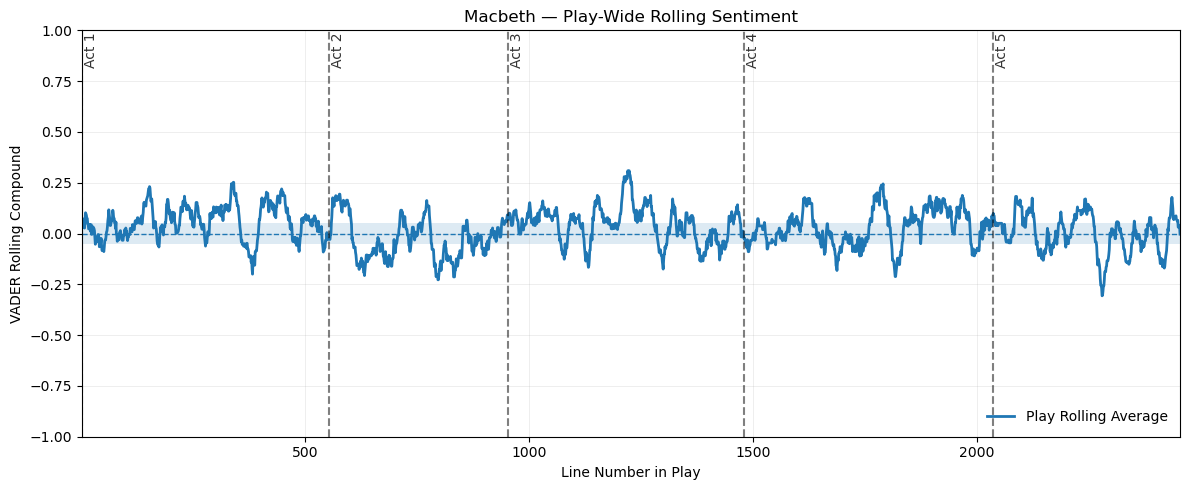

In [43]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'], linewidth=2, label='Play Rolling Average')

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title('Macbeth — Play-Wide Rolling Sentiment')

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)
    
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

### Macbeth's Lines & Emotional Arc Via VADER

In [44]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_Macbeth.html"

In [45]:
response = requests.get(url)

In [46]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nSo foul and fair a day I have not seen.<br/>\r\nSpeak if you can. What are you?<br/>\r\nStay, you imperfect speakers. Tell me more.<br/>\r\nBy Sinel’s death I know I am Thane of Glamis.<br/>\r\nBut how of Cawdor? The Thane of Cawdor lives<br/>\r\nA prosperous gentleman, and to be king<br/>\r\nStands not within the prospect of belief,<br/>\r\nNo more than to be Cawdor. Say from whence<br/>\r\nYou owe this strange intelligence or why<br/>\r\nUpon this blasted heath you stop our way<br/>\r\nWith such prophetic greeting. Speak, I charge you.<br/>\r\nInto the air, and what seemed corporal melted,<br/>\r\nAs breath into the wind. Would they had stayed!<br/>\r\nYour children shall be kings.<br/>\r\nAnd Thane of Cawdor too. Went it not so?<br/>\r\nThe Thane of Cawdor lives. Why do you dress me<br/>\r\nIn borrowed robes?<br/>\r\nGlamis and Thane of Cawdor!<br/>\r\nThe greatest is behind. Thanks for your pains.<br/>\r\n

In [47]:
macbeth_soup = BS(response.text, "html.parser")

In [48]:
macbeth_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
<br/>
So foul and fair a day I have not seen.<br/>
Speak if you can. What are you?<br/>
Stay, you imperfect speakers. Tell me more.<br/>
By Sinel’s death I know I am Thane of Glamis.<br/>
But how of Cawdor? The Thane of Cawdor lives<br/>
A prosperous gentleman, and to be king<br/>
Stands not within the prospect of belief,<br/>
No more than to be Cawdor. Say from whence<br/>
You owe this strange intelligence or why<br/>
Upon this blasted heath you stop our way<br/>
With such prophetic greeting. Speak, I charge you.<br/>
Into the air, and what seemed corporal melted,<br/>
As breath into the wind. Would they had stayed!<br/>
Your children shall be kings.<br/>
And Thane of Cawdor too. Went it not so?<br/>
The Thane of Cawdor lives. Why do you dress me<br/>
In borrowed robes?<br/>
Glamis and Thane of Cawdor!<br/>
The greatest is behind. Thanks for your pains.<br/>
Do you not hope your children shall be kings,<br/>
When those that gave the

In [49]:
macbeth_lines = macbeth_soup.get_text()

In [50]:
macbeth_lines = macbeth_lines.splitlines()

In [51]:
macbeth_lines = [ln.strip() for ln in macbeth_lines if ln.strip()]

In [52]:
macbeth_lines

['So foul and fair a day I have not seen.',
 'Speak if you can. What are you?',
 'Stay, you imperfect speakers. Tell me more.',
 'By Sinel’s death I know I am Thane of Glamis.',
 'But how of Cawdor? The Thane of Cawdor lives',
 'A prosperous gentleman, and to be king',
 'Stands not within the prospect of belief,',
 'No more than to be Cawdor. Say from whence',
 'You owe this strange intelligence or why',
 'Upon this blasted heath you stop our way',
 'With such prophetic greeting. Speak, I charge you.',
 'Into the air, and what seemed corporal melted,',
 'As breath into the wind. Would they had stayed!',
 'Your children shall be kings.',
 'And Thane of Cawdor too. Went it not so?',
 'The Thane of Cawdor lives. Why do you dress me',
 'In borrowed robes?',
 'Glamis and Thane of Cawdor!',
 'The greatest is behind. Thanks for your pains.',
 'Do you not hope your children shall be kings,',
 'When those that gave the Thane of Cawdor to me',
 'Promised no less to them?',
 'Two truths are told'

#### Semi-join to keep only the lines from macbeth_df whose text appears in macbeth_lines.

In [53]:
macbeth_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(macbeth_lines)].copy()

In [54]:
macbeth_only_df

,line_number,text,act,scene,scene_id,act_scene,play_neg,play_neu,play_pos,play_compound,play_vader_label,play_rolling_compound_wide,play_rolling_compound_narrow
129,130,So foul and fair a day I have not seen.,1,3,3,"Act 1, Scene 3",0.000,0.778,0.222,0.3744,pos,0.051124,0.058291
140,141,Speak if you can. What are you?,1,3,3,"Act 1, Scene 3",0.000,1.000,0.000,0.0000,neu,0.136119,0.059882
163,164,"Stay, you imperfect speakers. Tell me more.",1,3,3,"Act 1, Scene 3",0.277,0.723,0.000,-0.3182,neg,0.045067,-0.016455
164,165,By Sinel’s death I know I am Thane of Glamis.,1,3,3,"Act 1, Scene 3",0.302,0.698,0.000,-0.5994,neg,0.059210,-0.024455
165,166,But how of Cawdor? The Thane of Cawdor lives,1,3,3,"Act 1, Scene 3",0.000,1.000,0.000,0.0000,neu,0.030062,-0.055709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,2399,And to be baited with the rabble’s curse.,5,8,28,"Act 5, Scene 8",0.333,0.667,0.000,-0.5423,neg,0.024629,-0.102264
2399,2400,Though Birnam Wood be come to Dunsinane,5,8,28,"Act 5, Scene 8",0.000,1.000,0.000,0.0000,neu,0.024629,-0.042291
2400,2401,"And thou opposed, being of no woman born,",5,8,28,"Act 5, Scene 8",0.239,0.761,0.000,-0.2960,neg,-0.004619,-0.042291
2401,2402,Yet I will try the last. Before my body,5,8,28,"Act 5, Scene 8",0.000,1.000,0.000,0.0000,neu,-0.049433,0.017618


In [55]:
macbeth_only_df = macbeth_only_df.reset_index(drop=True)

In [56]:
macbeth_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [57]:
macbeth_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [58]:
macbeth_only_df = macbeth_only_df.rename(columns={'play_neg': 'mac_neg', 'play_neu': 'mac_neu', 'play_pos': 'mac_pos', 'play_vader_label': 'mac_vader_label', 'play_compound': 'mac_compound'})

In [59]:
macbeth_only_df

,line_number,text,act,scene,scene_id,act_scene,mac_neg,mac_neu,mac_pos,mac_compound,mac_vader_label
0,130,So foul and fair a day I have not seen.,1,3,3,"Act 1, Scene 3",0.000,0.778,0.222,0.3744,pos
1,141,Speak if you can. What are you?,1,3,3,"Act 1, Scene 3",0.000,1.000,0.000,0.0000,neu
2,164,"Stay, you imperfect speakers. Tell me more.",1,3,3,"Act 1, Scene 3",0.277,0.723,0.000,-0.3182,neg
3,165,By Sinel’s death I know I am Thane of Glamis.,1,3,3,"Act 1, Scene 3",0.302,0.698,0.000,-0.5994,neg
4,166,But how of Cawdor? The Thane of Cawdor lives,1,3,3,"Act 1, Scene 3",0.000,1.000,0.000,0.0000,neu
...,...,...,...,...,...,...,...,...,...,...,...
640,2399,And to be baited with the rabble’s curse.,5,8,28,"Act 5, Scene 8",0.333,0.667,0.000,-0.5423,neg
641,2400,Though Birnam Wood be come to Dunsinane,5,8,28,"Act 5, Scene 8",0.000,1.000,0.000,0.0000,neu
642,2401,"And thou opposed, being of no woman born,",5,8,28,"Act 5, Scene 8",0.239,0.761,0.000,-0.2960,neg
643,2402,Yet I will try the last. Before my body,5,8,28,"Act 5, Scene 8",0.000,1.000,0.000,0.0000,neu


In [60]:
macbeth_only_df["mac_vader_label"].value_counts()

mac_vader_label
neu    323
pos    174
neg    148
Name: count, dtype: int64

In [61]:
macbeth_only_df["mac_compound"].min()

-0.8807

In [62]:
macbeth_only_df.loc[(macbeth_only_df.mac_compound == -0.8807)]

,line_number,text,act,scene,scene_id,act_scene,mac_neg,mac_neu,mac_pos,mac_compound,mac_vader_label
141,614,"Nature seems dead, and wicked dreams abuse",2,1,8,"Act 2, Scene 1",0.676,0.17,0.153,-0.8807,neg


In [63]:
macbeth_only_df["mac_compound"].max()

0.9274

In [64]:
macbeth_only_df.loc[(macbeth_only_df.mac_compound == 0.9274)]

,line_number,text,act,scene,scene_id,act_scene,mac_neg,mac_neu,mac_pos,mac_compound,mac_vader_label
208,860,"That had a heart to love, and in that heart",2,3,10,"Act 2, Scene 3",0.0,0.357,0.643,0.9274,pos


In [65]:
high_threshold = 0.75
low_threshold = -0.75

In [66]:
emotional_highs_macbeth = macbeth_only_df[macbeth_only_df["mac_compound"] >= high_threshold]

In [67]:
emotional_lows_macbeth = macbeth_only_df[macbeth_only_df["mac_compound"] <= low_threshold]

In [68]:
print("Emotional Highs:")
display(emotional_highs_macbeth[["line_number", "act", "scene", "mac_compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_macbeth[["line_number", "act", "scene", "mac_compound", "text"]].head())

Emotional Highs:


,line_number,act,scene,mac_compound,text
25,236,1,3,0.7906,Why hath it given me earnest of success
44,264,1,3,0.8225,Our free hearts each to other.
51,296,1,4,0.8834,Safe toward your love and honor.
62,398,1,5,0.8316,"My dearest love,"
83,474,1,7,0.8588,"So clear in his great office, that his virtues"


Emotional Lows:


,line_number,act,scene,mac_compound,text
90,481,1,7,-0.7783,That tears shall drown the wind. I have no spur
141,614,2,1,-0.8807,"Nature seems dead, and wicked dreams abuse"
166,679,2,2,-0.7506,"The death of each day’s life, sore labor’s bath,"
329,1141,3,2,-0.8544,"Treason has done his worst; nor steel nor poison,"
395,1282,3,4,-0.8316,Which might appall the devil.


In [69]:
macbeth_only_df['mac_rolling_compound'] = (
    macbeth_only_df['mac_compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

##### This shows how strong Macbeth's emotion is a local window, regardless of positive or negative. To do this, I took the absolute value of each line's VADER score so that highs and lows both count as "intense", then average the last 5 + current + 5 Macbeth lines so that I can show the "peaks" and "valley" of Macbeth's emotion.

In [70]:
macbeth_only_df['rolling_intensity']=(
    macbeth_only_df['mac_compound'].abs().rolling(window=11, center=True, min_periods=1).mean()
)

##### This shows how unstable Macbeth's tone is from line to line. It looks at the standard deviation of the mac_compound column. Bigger spread = more whiplash between positive and negative lines. Spikes show mood swings, while flat sections suggest a steady tone.)

In [71]:
macbeth_only_df['rolling_volatility'] = (
    macbeth_only_df['mac_compound'].rolling(window=11, center=True, min_periods=1).std()
)

##### This groups consecutive Macbeth lines into speeches. Whenever there is a gap between line_numbers greater than 1, it starts a "new speech." It cumulatively numbers the speeches from 0 upward. This will let me aggregate by Macbeth's turns of speaking, which might be useful for speech-level summaries and charts.

In [72]:
macbeth_only_df['speech_id'] = (macbeth_only_df['line_number'].diff().gt(1)).cumsum()

##### This up-weights lines with strong emotion so that they count more in later averages. To get this, I multiplied each line's sentiment by its magnitude. It will show a per-line score where dramatic lines have extra influence and mild lines contribute less.

In [73]:
macbeth_only_df['weighted_compound'] = (
    macbeth_only_df['mac_compound'] * macbeth_only_df['mac_compound'].abs()
)

##### This smooths the weighted sentiment by averaging the weighted compound values across the window established above. This will let big emotional moments pull the curve more than the regular rolling average.

In [74]:
macbeth_only_df['rolling_weighted'] = (
    macbeth_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

##### This turns the VADER label into simple 0/1 flags for positive and negative lines so that I can possibly create a "share of positive" or "share of negative" calculation.

In [75]:
macbeth_only_df['is_pos'] = (macbeth_only_df['mac_vader_label']=='pos').astype(int)

In [76]:
macbeth_only_df['is_neg'] = (macbeth_only_df['mac_vader_label']=='neg').astype(int)

##### This shows the balance of positive vs. negative lines in each window. It takes the average of "is_pos" minus the average of "is_neg).

In [77]:
macbeth_only_df['roll_pos_minus_neg'] = (
    macbeth_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - macbeth_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

##### This adds two columns that compares Macbeth's smooth sentiment to the play's smoothed baseline at the same spot in the script. I subtracted Macbeth's rolling score from the play's at the same line number. If it is positive, then Macbeth is "brighter" than the surrounding tone at that moment in the play. If it is negative, then Macbeth is "darker" than the surrounding tone.

In [78]:
sentiment_difference = macbeth_only_df[['line_number', 'mac_rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [79]:
macbeth_only_df['diff_vs_play_w21'] = (
    sentiment_difference['mac_rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [80]:
macbeth_only_df['diff_vs_play_w11'] = (
    sentiment_difference['mac_rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [81]:
macbeth_only_df.head()

,line_number,text,act,scene,scene_id,act_scene,mac_neg,mac_neu,mac_pos,mac_compound,...,rolling_intensity,rolling_volatility,speech_id,weighted_compound,rolling_weighted,is_pos,is_neg,roll_pos_minus_neg,diff_vs_play_w21,diff_vs_play_w11
0,130,So foul and fair a day I have not seen.,1,3,3,"Act 1, Scene 3",0.000,0.778,0.222,0.3744,...,0.294783,0.406746,0,0.140175,-0.015519,1,0,0.000000,-0.062207,-0.069374
1,141,Speak if you can. What are you?,1,3,3,"Act 1, Scene 3",0.000,1.000,0.000,0.0000,...,0.284600,0.379888,1,0.000000,-0.020438,0,0,-0.142857,-0.177548,-0.101310
2,164,"Stay, you imperfect speakers. Tell me more.",1,3,3,"Act 1, Scene 3",0.277,0.723,0.000,-0.3182,...,0.286025,0.363041,2,-0.101251,-0.028835,0,1,-0.250000,-0.118317,-0.056795
3,165,By Sinel’s death I know I am Thane of Glamis.,1,3,3,"Act 1, Scene 3",0.302,0.698,0.000,-0.5994,...,0.284600,0.358693,2,-0.359280,-0.017338,0,1,-0.111111,-0.093965,-0.010301
4,166,But how of Cawdor? The Thane of Cawdor lives,1,3,3,"Act 1, Scene 3",0.000,1.000,0.000,0.0000,...,0.285740,0.348123,2,0.000000,-0.024366,0,0,-0.200000,-0.090942,-0.005171


#### Macbeth's Emotional Arc (Raw VADER Score)

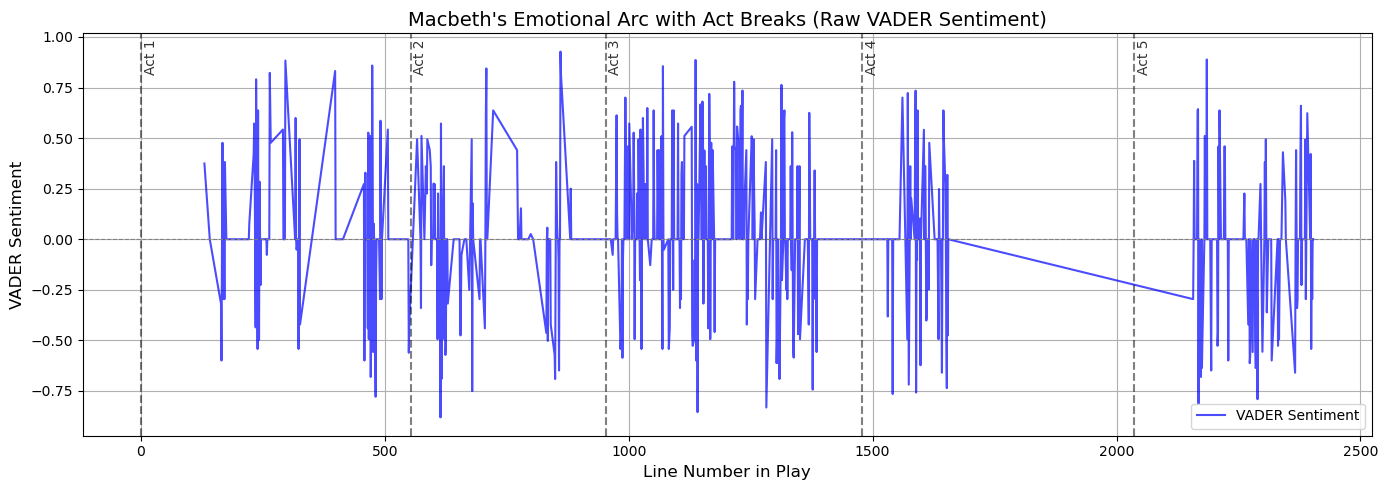

In [82]:
plt.figure(figsize=(14, 5))

plt.plot(macbeth_only_df["line_number"], macbeth_only_df["mac_compound"], label="VADER Sentiment", color="blue", alpha=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)

plt.title("Macbeth's Emotional Arc with Act Breaks (Raw VADER Sentiment)", fontsize=14)
plt.xlabel("Line Number in Play", fontsize=12)
plt.ylabel("VADER Sentiment", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

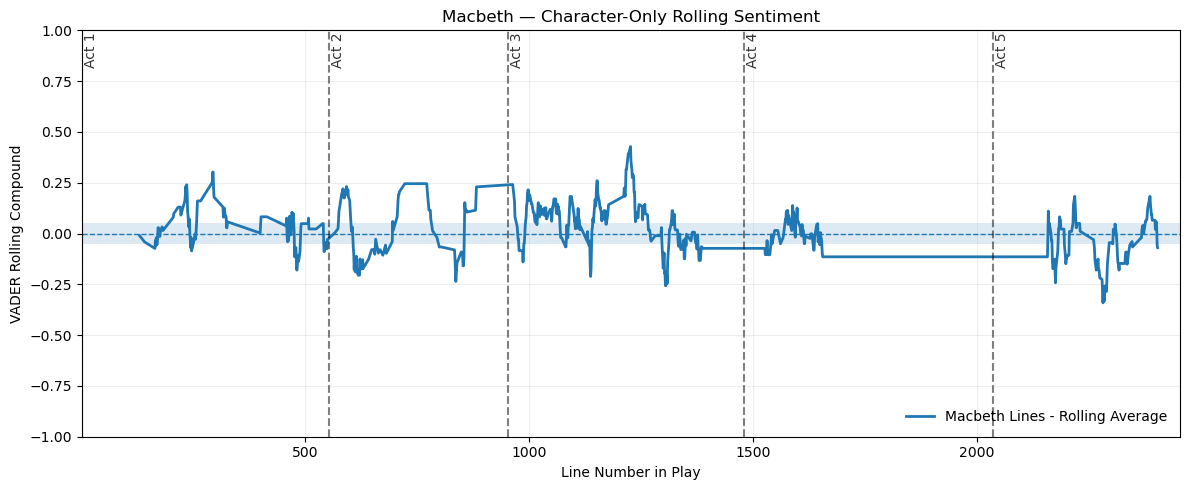

In [156]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(macbeth_only_df['line_number'], macbeth_only_df['mac_rolling_compound'], linewidth=2, label='Macbeth Lines - Rolling Average')

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title('Macbeth — Character-Only Rolling Sentiment')

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)
    
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

#### Macbeth's Character Arc vs. The Play

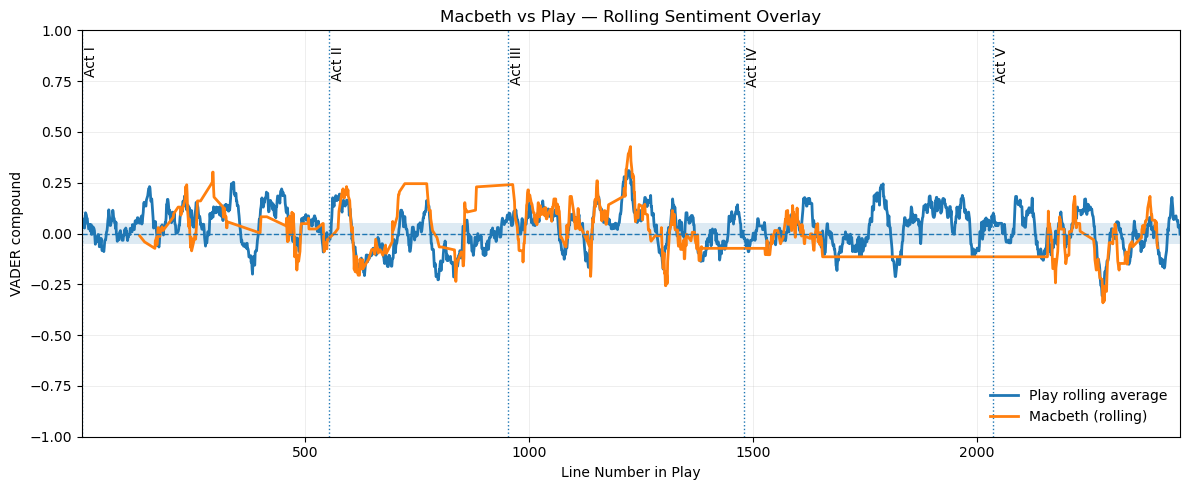

In [157]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'], linewidth=2, label='Play rolling average')
ax.plot(macbeth_only_df['line_number'], macbeth_only_df['mac_rolling_compound'], linewidth=2, label="Macbeth (rolling)")

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER compound')
ax.set_title("Macbeth vs Play — Rolling Sentiment Overlay")

act_starts = macbeth_full_text_df.groupby('act')['line_number'].min()
roman = {1:'I',2:'II',3:'III',4:'IV',5:'V'}
for a, ln in act_starts.items():
    ax.axvline(ln, linestyle=':', linewidth=1)
    ax.text(ln + 5, 0.92*ax.get_ylim()[1], f'Act {roman.get(int(a), a)}',
            rotation=90, va='top', ha='left')

ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

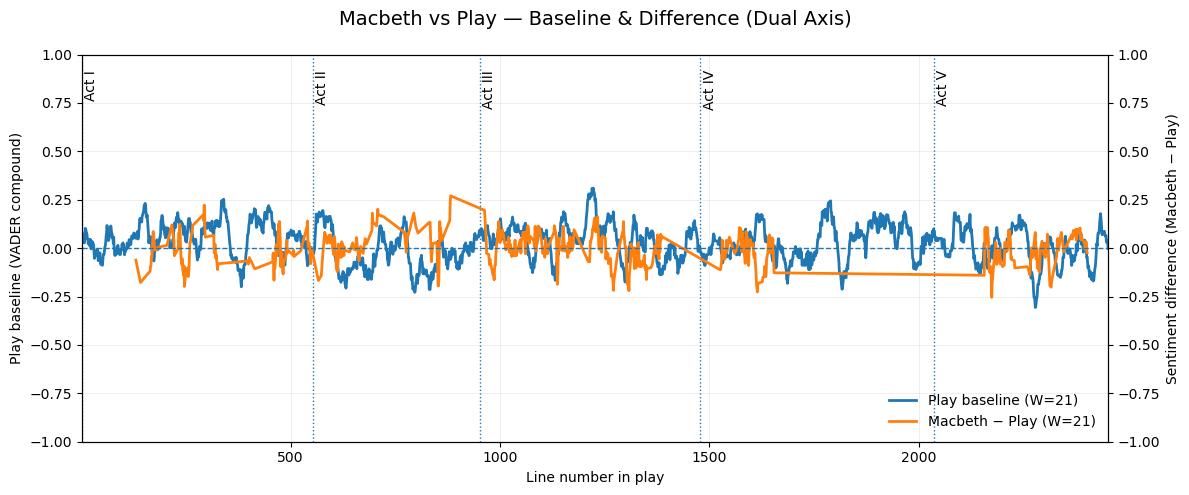

In [85]:
fig, ax1 = plt.subplots(figsize=(12,5))

ln1, = ax1.plot(
    macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, label='Play baseline (W=21)'
)
ax1.set_xlabel('Line number in play')
ax1.set_ylabel('Play baseline (VADER compound)')
ax1.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())
ax1.set_ylim(-1, 1)
ax1.grid(True, linewidth=0.5, alpha=0.3)

ax2 = ax1.twinx()
ln2, = ax2.plot(
    macbeth_only_df['line_number'], macbeth_only_df['diff_vs_play_w21'],
    color='tab:orange', linewidth=2, label='Macbeth − Play (W=21)'
)
ax2.axhline(0, linestyle='--', linewidth=1)
ax2.set_ylabel('Sentiment difference (Macbeth − Play)')
ax2.set_ylim(-1, 1)

for act, start in act_starts.items():
    ax1.axvline(start, linestyle=':', linewidth=1)
    ax1.text(
        start + 5, 0.92 * ax1.get_ylim()[1],
        f'Act {roman[act]}', rotation=90, va='top', ha='left'
    )

lines = [ln1, ln2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', frameon=False)

fig.suptitle("Macbeth vs Play — Baseline & Difference (Dual Axis)", fontsize=14)
fig.tight_layout()
plt.show()

### Lady MacBeth's Lines & Emotional Arc Via VADER

In [86]:
url = "https://www.folgerdigitaltexts.org/Mac/charText/Mac_LadyMacbeth.html"

In [87]:
response = requests.get(url)

In [88]:
response.text

"<html>\r\n<head>\r\n<meta charset='utf-8'>\r\n</head>\r\n<body>\r\n<br/>\r\nThey met me in the<br/>\r\nday of success, and I have learned by the perfect’st<br/>\r\nreport they have more in them than mortal knowledge.<br/>\r\nWhen I burned in desire to question them further, they<br/>\r\nmade themselves air, into which they vanished.<br/>\r\nWhiles I stood rapt in the wonder of it came missives<br/>\r\nfrom the King, who all-hailed me “Thane of Cawdor,”<br/>\r\nby which title, before, these Weïrd Sisters saluted me<br/>\r\nand referred me to the coming on of time with “Hail,<br/>\r\nking that shalt be.” This have I thought good to deliver<br/>\r\nthee, my dearest partner of greatness, that thou<br/>\r\nmight’st not lose the dues of rejoicing by being ignorant<br/>\r\nof what greatness is promised thee. Lay it to thy<br/>\r\nheart, and farewell.<br/>\r\nGlamis thou art, and Cawdor, and shalt be<br/>\r\nWhat thou art promised. Yet do I fear thy nature;<br/>\r\nIt is too full o’ th’ milk 

In [89]:
lady_macbeth_soup = BS(response.text, "html.parser")

In [90]:
lady_macbeth_soup

<html>
<head>
<meta charset="utf-8"/>
</head>
<body>
<br/>
They met me in the<br/>
day of success, and I have learned by the perfect’st<br/>
report they have more in them than mortal knowledge.<br/>
When I burned in desire to question them further, they<br/>
made themselves air, into which they vanished.<br/>
Whiles I stood rapt in the wonder of it came missives<br/>
from the King, who all-hailed me “Thane of Cawdor,”<br/>
by which title, before, these Weïrd Sisters saluted me<br/>
and referred me to the coming on of time with “Hail,<br/>
king that shalt be.” This have I thought good to deliver<br/>
thee, my dearest partner of greatness, that thou<br/>
might’st not lose the dues of rejoicing by being ignorant<br/>
of what greatness is promised thee. Lay it to thy<br/>
heart, and farewell.<br/>
Glamis thou art, and Cawdor, and shalt be<br/>
What thou art promised. Yet do I fear thy nature;<br/>
It is too full o’ th’ milk of human kindness<br/>
To catch the nearest way. Thou wouldst be g

In [91]:
lady_macbeth_lines = lady_macbeth_soup.get_text()

In [92]:
lady_macbeth_lines = lady_macbeth_lines.splitlines()

In [93]:
lady_macbeth_lines = [ln.strip() for ln in lady_macbeth_lines if ln.strip()]

In [94]:
lady_macbeth_lines

['They met me in the',
 'day of success, and I have learned by the perfect’st',
 'report they have more in them than mortal knowledge.',
 'When I burned in desire to question them further, they',
 'made themselves air, into which they vanished.',
 'Whiles I stood rapt in the wonder of it came missives',
 'from the King, who all-hailed me “Thane of Cawdor,”',
 'by which title, before, these Weïrd Sisters saluted me',
 'and referred me to the coming on of time with “Hail,',
 'king that shalt be.” This have I thought good to deliver',
 'thee, my dearest partner of greatness, that thou',
 'might’st not lose the dues of rejoicing by being ignorant',
 'of what greatness is promised thee. Lay it to thy',
 'heart, and farewell.',
 'Glamis thou art, and Cawdor, and shalt be',
 'What thou art promised. Yet do I fear thy nature;',
 'It is too full o’ th’ milk of human kindness',
 'To catch the nearest way. Thou wouldst be great,',
 'Art not without ambition, but without',
 'The illness should att

In [95]:
lady_macbeth_only_df = macbeth_full_text_df[macbeth_full_text_df["text"].isin(lady_macbeth_lines)].copy()

In [96]:
lady_macbeth_only_df.head()

,line_number,text,act,scene,scene_id,act_scene,play_neg,play_neu,play_pos,play_compound,play_vader_label,play_rolling_compound_wide,play_rolling_compound_narrow
331,332,They met me in the,1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,neu,0.143086,0.218155
332,333,"day of success, and I have learned by the perf...",1,5,5,"Act 1, Scene 5",0.0,0.709,0.291,0.5719,pos,0.171990,0.155355
333,334,report they have more in them than mortal know...,1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,neu,0.215014,0.155355
334,335,When I burned in desire to question them furth...,1,5,5,"Act 1, Scene 5",0.0,0.769,0.231,0.4019,pos,0.245343,0.162373
335,336,"made themselves air, into which they vanished.",1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,neu,0.221824,0.135582


In [97]:
lady_macbeth_only_df = lady_macbeth_only_df.reset_index(drop=True)

In [98]:
lady_macbeth_only_df.drop(columns='play_rolling_compound_wide', inplace=True)

In [99]:
lady_macbeth_only_df.drop(columns='play_rolling_compound_narrow', inplace=True)

In [100]:
lady_macbeth_only_df = lady_macbeth_only_df.rename(columns={'play_neg': 'ladym_neg', 'play_neu': 'ladym_neu', 'play_pos': 'ladym_pos', 'play_vader_label': 'ladym_vader_label', 'play_compound': 'ladym_compound'})

In [101]:
lady_macbeth_only_df.head()

,line_number,text,act,scene,scene_id,act_scene,ladym_neg,ladym_neu,ladym_pos,ladym_compound,ladym_vader_label
0,332,They met me in the,1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,neu
1,333,"day of success, and I have learned by the perf...",1,5,5,"Act 1, Scene 5",0.0,0.709,0.291,0.5719,pos
2,334,report they have more in them than mortal know...,1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,neu
3,335,When I burned in desire to question them furth...,1,5,5,"Act 1, Scene 5",0.0,0.769,0.231,0.4019,pos
4,336,"made themselves air, into which they vanished.",1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,neu


In [102]:
lady_macbeth_only_df["ladym_vader_label"].value_counts()

ladym_vader_label
neu    122
neg     59
pos     56
Name: count, dtype: int64

In [103]:
lady_macbeth_only_df["ladym_compound"].min()

-0.802

In [104]:
lady_macbeth_only_df.loc[(lady_macbeth_only_df.ladym_compound == -0.802)]

,line_number,text,act,scene,scene_id,act_scene,ladym_neg,ladym_neu,ladym_pos,ladym_compound,ladym_vader_label
142,700,"That fears a painted devil. If he do bleed,",2,2,9,"Act 2, Scene 2",0.507,0.493,0.0,-0.802,neg


In [105]:
lady_macbeth_only_df["ladym_compound"].max()

0.802

In [106]:
lady_macbeth_only_df.loc[(lady_macbeth_only_df.ladym_compound == 0.802)]

,line_number,text,act,scene,scene_id,act_scene,ladym_neg,ladym_neu,ladym_pos,ladym_compound,ladym_vader_label
180,1219,For my heart speaks they are welcome.,3,4,15,"Act 3, Scene 4",0.0,0.410,0.590,0.802,pos
184,1249,’Tis given with welcome. To feed were best at ...,3,4,15,"Act 3, Scene 4",0.0,0.526,0.474,0.802,pos


In [107]:
emotional_highs_lady_macbeth = lady_macbeth_only_df[lady_macbeth_only_df["ladym_compound"] >= high_threshold]

In [108]:
emotional_lows_lady_macbeth = lady_macbeth_only_df[lady_macbeth_only_df["ladym_compound"] <= low_threshold]

In [109]:
print("Emotional Highs:")
display(emotional_highs_lady_macbeth[["line_number", "act", "scene", "ladym_compound", "text"]].head())

print("Emotional Lows:")
display(emotional_lows_lady_macbeth[["line_number", "act", "scene", "ladym_compound", "text"]].head())

Emotional Highs:


,line_number,act,scene,ladym_compound,text
180,1219,3,4,0.802,For my heart speaks they are welcome.
184,1249,3,4,0.802,’Tis given with welcome. To feed were best at ...


Emotional Lows:


,line_number,act,scene,ladym_compound,text
102,534,1,7,-0.7717,"Their drenchèd natures lies as in a death,"
142,700,2,2,-0.8020,"That fears a painted devil. If he do bleed,"


In [110]:
lady_macbeth_only_df['ladym_rolling_compound'] = (
    lady_macbeth_only_df['ladym_compound']
    .rolling(window=11, center=True, min_periods=1)
    .mean()
)

In [111]:
lady_macbeth_only_df['rolling_intensity']=(
    lady_macbeth_only_df['ladym_compound'].abs().rolling(window=11, center=True, min_periods=1).mean()
)

In [112]:
lady_macbeth_only_df['rolling_volatility'] = (
    lady_macbeth_only_df['ladym_compound'].rolling(window=11, center=True, min_periods=1).std()
)

In [113]:
lady_macbeth_only_df['speech_id'] = (lady_macbeth_only_df['line_number'].diff().gt(1)).cumsum()

In [114]:
lady_macbeth_only_df['weighted_compound'] = (
    lady_macbeth_only_df['ladym_compound'] * lady_macbeth_only_df['ladym_compound'].abs()
)

In [115]:
lady_macbeth_only_df['rolling_weighted'] = (
    lady_macbeth_only_df['weighted_compound'].rolling(window=11, center=True, min_periods=1).mean()
)

In [116]:
lady_macbeth_only_df['is_pos'] = (lady_macbeth_only_df['ladym_vader_label']=='pos').astype(int)

In [117]:
lady_macbeth_only_df['is_neg'] = (lady_macbeth_only_df['ladym_vader_label']=='neg').astype(int)

In [118]:
lady_macbeth_only_df['roll_pos_minus_neg'] = (
    lady_macbeth_only_df['is_pos'].rolling(window=11, center=True, min_periods=1).mean()
    - lady_macbeth_only_df['is_neg'].rolling(window=11, center=True, min_periods=1).mean()
)

In [119]:
sentiment_difference = lady_macbeth_only_df[['line_number', 'ladym_rolling_compound']].merge(
    macbeth_full_text_df[['line_number', 'play_rolling_compound_wide', 'play_rolling_compound_narrow']],
    on='line_number', how='left'
)

In [120]:
lady_macbeth_only_df['diff_vs_play_w21'] = (
    sentiment_difference['ladym_rolling_compound'] - sentiment_difference['play_rolling_compound_wide']
)

In [121]:
lady_macbeth_only_df['diff_vs_play_w11'] = (
    sentiment_difference['ladym_rolling_compound'] - sentiment_difference['play_rolling_compound_narrow']
)

In [122]:
lady_macbeth_only_df.head()

,line_number,text,act,scene,scene_id,act_scene,ladym_neg,ladym_neu,ladym_pos,ladym_compound,...,rolling_intensity,rolling_volatility,speech_id,weighted_compound,rolling_weighted,is_pos,is_neg,roll_pos_minus_neg,diff_vs_play_w21,diff_vs_play_w11
0,332,They met me in the,1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,...,0.162300,0.257117,0,0.000000,0.081432,0,0,0.333333,0.019214,-0.055855
1,333,"day of success, and I have learned by the perf...",1,5,5,"Act 1, Scene 5",0.0,0.709,0.291,0.5719,...,0.139114,0.242598,0,0.327070,0.069799,1,0,0.285714,-0.032876,-0.016240
2,334,report they have more in them than mortal know...,1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,...,0.191400,0.268917,0,0.000000,0.099911,0,0,0.375000,-0.023614,0.036045
3,335,When I burned in desire to question them furth...,1,5,5,"Act 1, Scene 5",0.0,0.769,0.231,0.4019,...,0.237578,0.287173,0,0.161524,0.129749,1,0,0.444444,-0.007765,0.075205
4,336,"made themselves air, into which they vanished.",1,5,5,"Act 1, Scene 5",0.0,1.000,0.000,0.0000,...,0.249940,0.273557,0,0.000000,0.129820,0,0,0.500000,0.028116,0.114358


#### Lady Macbeth's Emotional Arc (Raw VADAR Score)

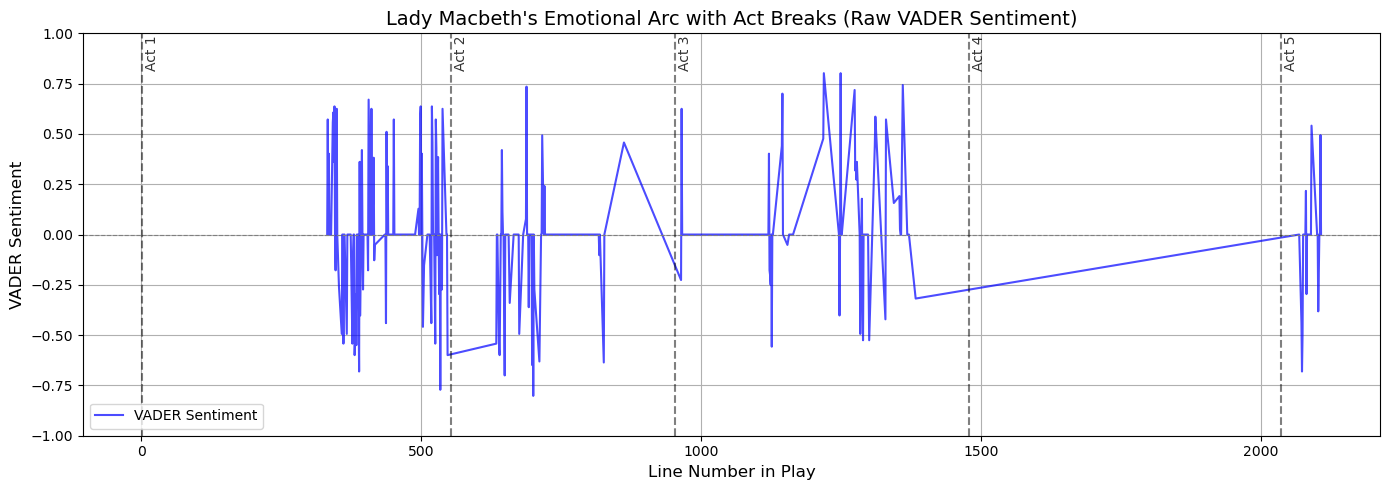

In [138]:
plt.figure(figsize=(14, 5))

plt.plot(lady_macbeth_only_df["line_number"], lady_macbeth_only_df["ladym_compound"], label="VADER Sentiment", color="blue", alpha=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, .9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)

plt.title("Lady Macbeth's Emotional Arc with Act Breaks (Raw VADER Sentiment)", fontsize=14)
plt.xlabel("Line Number in Play", fontsize=12)
plt.ylabel("VADER Sentiment", fontsize=12)
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [147]:
macbeth_full_text_df = macbeth_full_text_df.merge(
    lady_macbeth_only_df[['line_number', 'ladym_compound']],
    on='line_number', how='left'
)

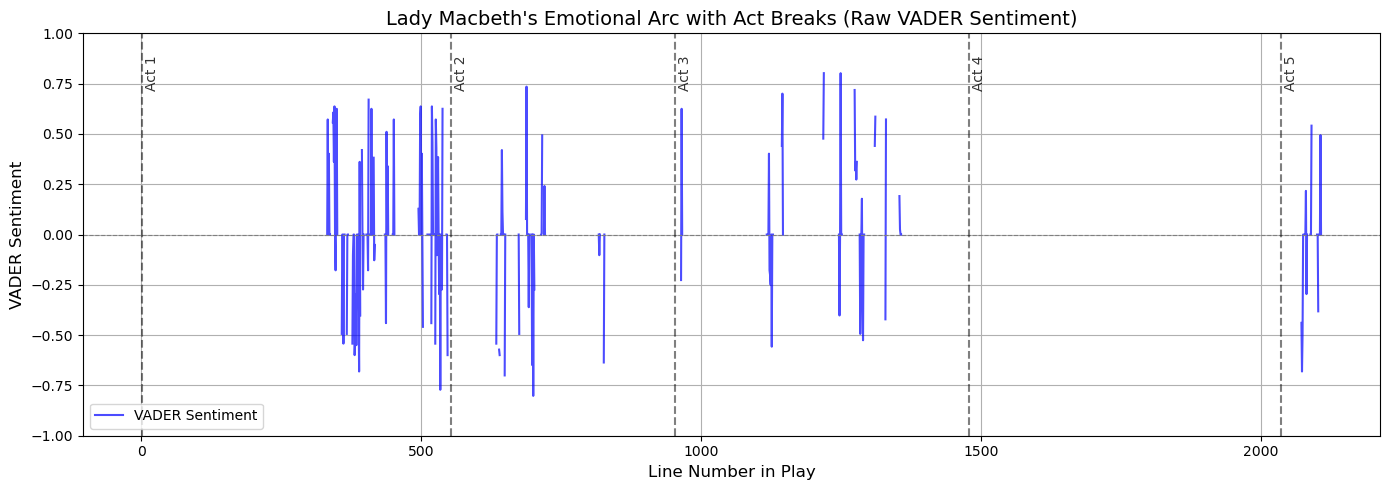

In [148]:
plt.figure(figsize=(14, 5))

plt.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['ladym_compound'],
    label='VADER Sentiment', color='blue', alpha=0.7
)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.8, f"Act {act}", rotation=90,
             va='center', fontsize=10, alpha=0.8)

plt.title("Lady Macbeth's Emotional Arc with Act Breaks (Raw VADER Sentiment)", fontsize=14)
plt.xlabel("Line Number in Play", fontsize=12)
plt.ylabel("VADER Sentiment", fontsize=12)
plt.ylim(-1, 1)                # same scale as Macbeth
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [150]:
macbeth_full_text_df = macbeth_full_text_df.merge(
    macbeth_only_df[['line_number', 'mac_compound']],
    on='line_number', how='left'
)

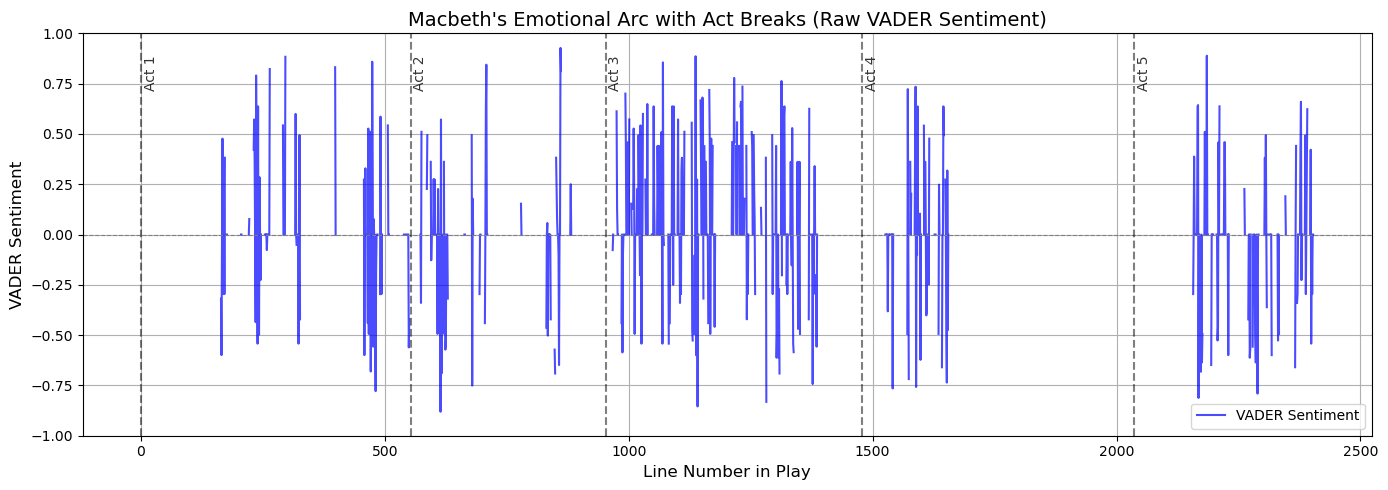

In [151]:
plt.figure(figsize=(14, 5))

plt.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['mac_compound'],
    label='VADER Sentiment', color='blue', alpha=0.7
)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.8, f"Act {act}", rotation=90,
             va='center', fontsize=10, alpha=0.8)

plt.title("Macbeth's Emotional Arc with Act Breaks (Raw VADER Sentiment)", fontsize=14)
plt.xlabel("Line Number in Play", fontsize=12)
plt.ylabel("VADER Sentiment", fontsize=12)
plt.ylim(-1, 1)                # same scale as Macbeth
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

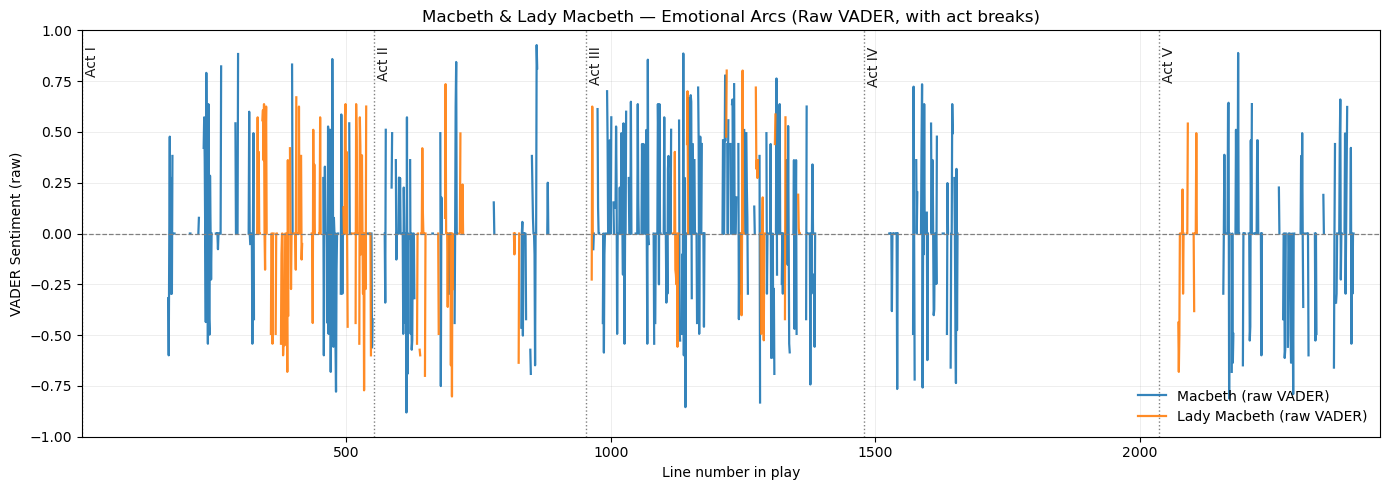

In [152]:
fig, ax = plt.subplots(figsize=(14,5))

ax.plot(
    macbeth_full_text_df['line_number'], macbeth_full_text_df['mac_compound'],
    color='tab:blue', linewidth=1.6, label='Macbeth (raw VADER)', alpha=0.9
)
ax.plot(
    macbeth_full_text_df['line_number'], macbeth_full_text_df['ladym_compound'],
    color='tab:orange', linewidth=1.6, label='Lady Macbeth (raw VADER)', alpha=0.9
)

ax.axhline(0, color='gray', linestyle='--', linewidth=0.9)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())

for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Sentiment (raw)')
ax.set_title("Macbeth & Lady Macbeth — Emotional Arcs (Raw VADER, with act breaks)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

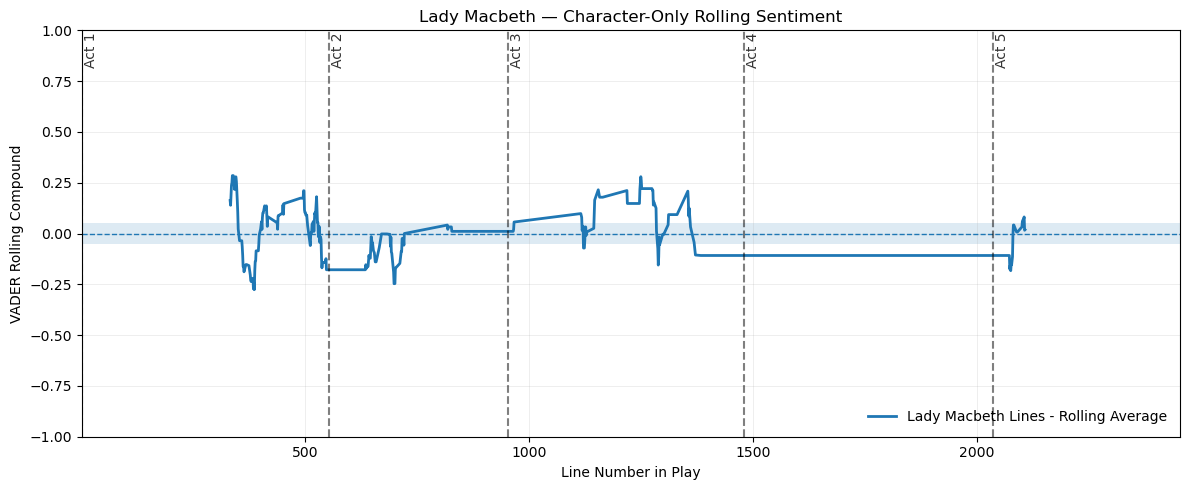

In [155]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(lady_macbeth_only_df['line_number'], lady_macbeth_only_df['ladym_rolling_compound'], linewidth=2, label='Lady Macbeth Lines - Rolling Average')

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title('Lady Macbeth — Character-Only Rolling Sentiment')

for act, start_line in act_starts.items():
    plt.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    plt.text(start_line + 5, 0.9, f"Act {act}", rotation=90, verticalalignment='center', fontsize=10, alpha=0.8)
    
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

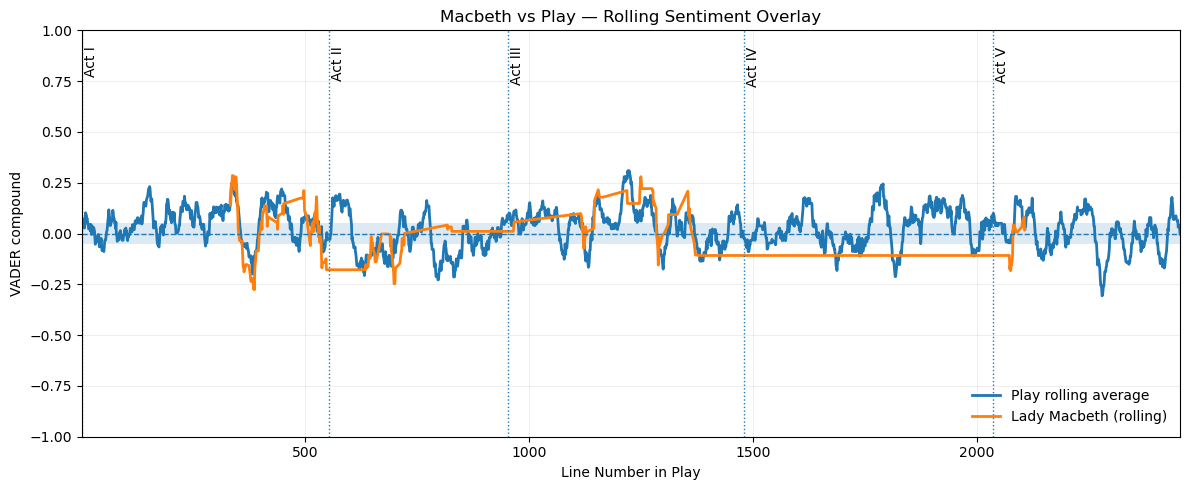

In [169]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'], linewidth=2, label='Play rolling average')
ax.plot(lady_macbeth_only_df['line_number'], lady_macbeth_only_df['ladym_rolling_compound'], linewidth=2, label="Lady Macbeth (rolling)")

ax.axhspan(-0.05, 0.05, alpha=0.15, zorder=0)
ax.axhline(0, linestyle='--', linewidth=1)

ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER compound')
ax.set_title("Macbeth vs Play — Rolling Sentiment Overlay")

act_starts = macbeth_full_text_df.groupby('act')['line_number'].min()
roman = {1:'I',2:'II',3:'III',4:'IV',5:'V'}
for a, ln in act_starts.items():
    ax.axvline(ln, linestyle=':', linewidth=1)
    ax.text(ln + 5, 0.92*ax.get_ylim()[1], f'Act {roman.get(int(a), a)}',
            rotation=90, va='top', ha='left')

ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

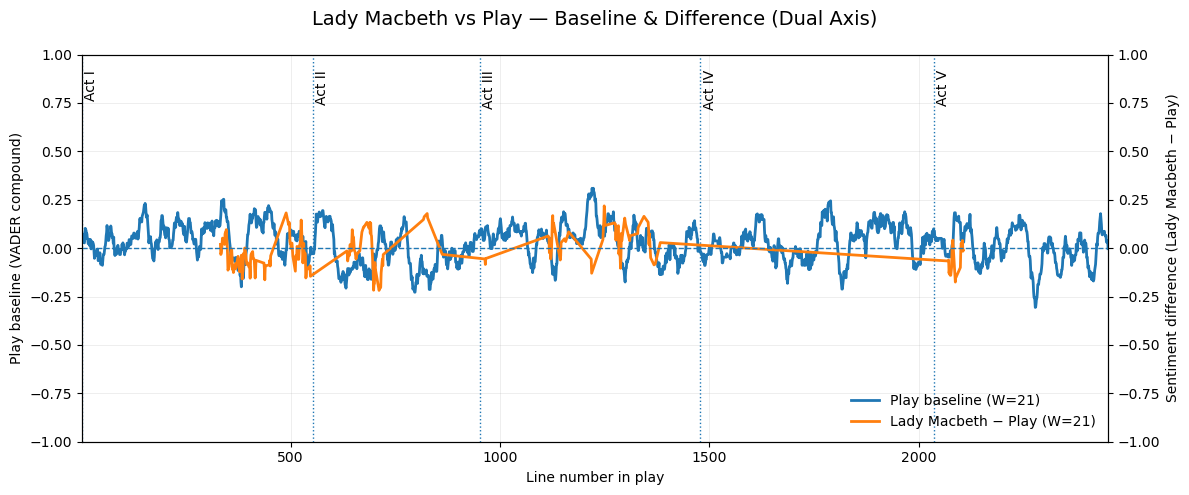

In [160]:
fig, ax1 = plt.subplots(figsize=(12,5))

ln1, = ax1.plot(
    macbeth_full_text_df['line_number'], macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, label='Play baseline (W=21)'
)
ax1.set_xlabel('Line number in play')
ax1.set_ylabel('Play baseline (VADER compound)')
ax1.set_xlim(macbeth_full_text_df['line_number'].min(), macbeth_full_text_df['line_number'].max())
ax1.set_ylim(-1, 1)
ax1.grid(True, linewidth=0.5, alpha=0.3)

ax2 = ax1.twinx()
ln2, = ax2.plot(
    lady_macbeth_only_df['line_number'], lady_macbeth_only_df['diff_vs_play_w21'],
    color='tab:orange', linewidth=2, label='Lady Macbeth − Play (W=21)'
)
ax2.axhline(0, linestyle='--', linewidth=1)
ax2.set_ylabel('Sentiment difference (Lady Macbeth − Play)')
ax2.set_ylim(-1, 1)

for act, start in act_starts.items():
    ax1.axvline(start, linestyle=':', linewidth=1)
    ax1.text(
        start + 5, 0.92 * ax1.get_ylim()[1],
        f'Act {roman[act]}', rotation=90, va='top', ha='left'
    )

lines = [ln1, ln2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', frameon=False)

fig.suptitle("Lady Macbeth vs Play — Baseline & Difference (Dual Axis)", fontsize=14)
fig.tight_layout()
plt.show()

In [161]:
lady_macbeth_only_df['rolling_within_speech'] = (
    lady_macbeth_only_df
    .groupby('speech_id')['ladym_compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [162]:
macbeth_only_df['rolling_within_speech'] = (
    macbeth_only_df
    .groupby('speech_id')['mac_compound']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

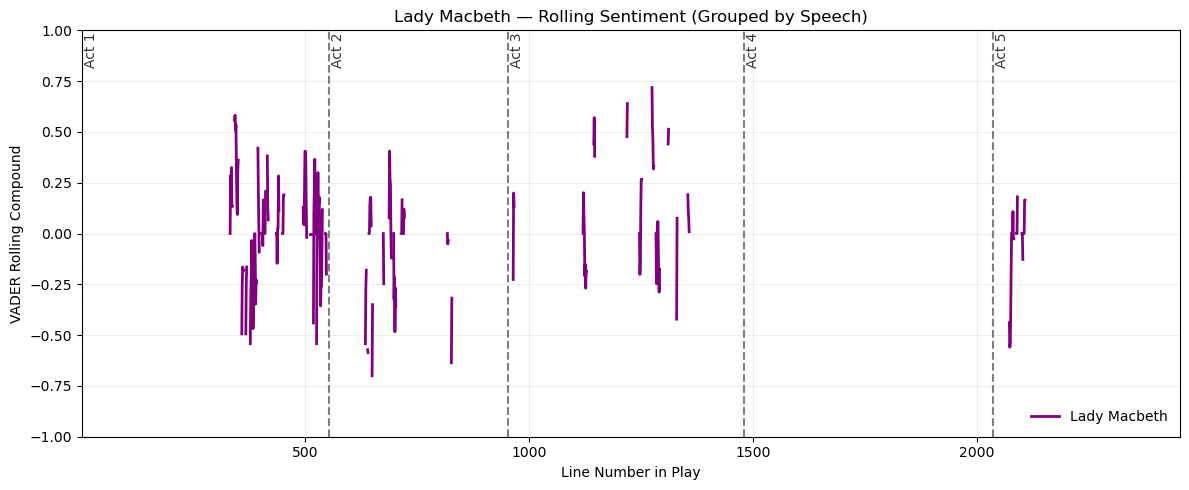

In [166]:
fig, ax = plt.subplots(figsize=(12, 5))

# plot each speech in the same color/style
for _, group in lady_macbeth_only_df.groupby('speech_id'):
    ax.plot(
        group['line_number'],
        group['rolling_within_speech'],
        color='purple',           # fixed color
        linewidth=2,
        label='Lady Macbeth' if _ == 0 else ""   # label only once
    )

# keep act lines/titles
for act, start_line in act_starts.items():
    ax.axvline(start_line, color='black', linestyle='--', alpha=0.5)
    ax.text(start_line + 5, 0.9, f"Act {act}", rotation=90,
            verticalalignment='center', fontsize=10, alpha=0.8)

ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())
ax.set_ylim(-1, 1)
ax.set_xlabel('Line Number in Play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title('Lady Macbeth — Rolling Sentiment (Grouped by Speech)')
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

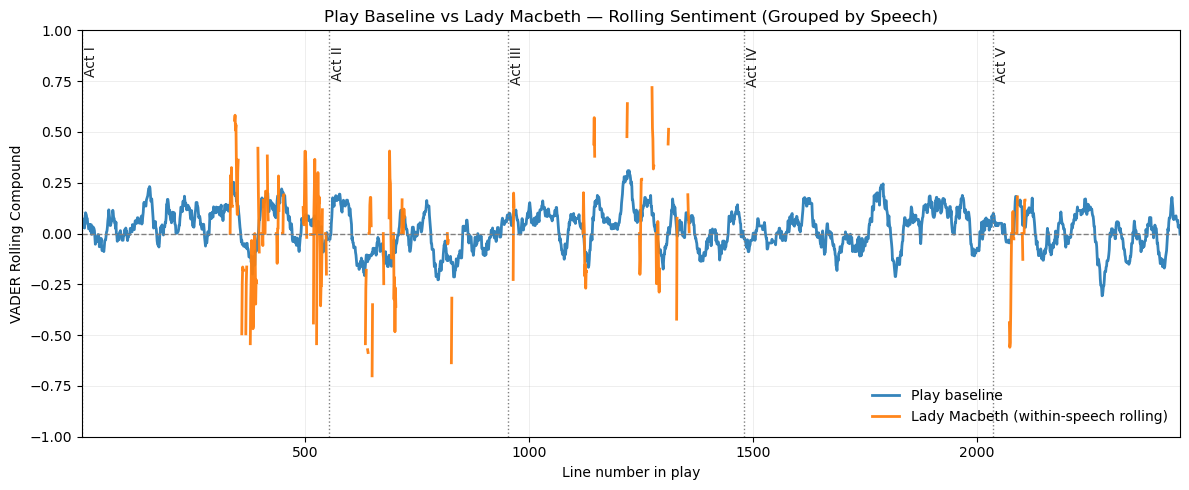

In [172]:
fig, ax = plt.subplots(figsize=(12, 5))

# Play baseline (continuous)
ax.plot(
    macbeth_full_text_df['line_number'],
    macbeth_full_text_df['play_rolling_compound_wide'],
    color='tab:blue', linewidth=2, alpha=0.9,
    label='Play baseline'
)

# Lady Macbeth, segmented by speech (no line drawn across silent gaps)
first = True
for _, g in lady_macbeth_only_df.groupby('speech_id'):
    ax.plot(
        g['line_number'], g['rolling_within_speech'],
        color='tab:orange', linewidth=2, alpha=0.95,
        label='Lady Macbeth (within-speech rolling)' if first else ""
    )
    first = False

# Reference line & limits
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylim(-1, 1)
ax.set_xlim(macbeth_full_text_df['line_number'].min(),
            macbeth_full_text_df['line_number'].max())

# Act markers (using your dicts)
for act, start in act_starts.items():
    ax.axvline(start, color='gray', linestyle=':', linewidth=1)
    ax.text(start + 5, 0.92 * ax.get_ylim()[1], f'Act {roman[act]}',
            rotation=90, va='top', ha='left', fontsize=10, alpha=0.9)

# Labels, legend, grid
ax.set_xlabel('Line number in play')
ax.set_ylabel('VADER Rolling Compound')
ax.set_title("Play Baseline vs Lady Macbeth — Rolling Sentiment (Grouped by Speech)")
ax.legend(loc='lower right', frameon=False)
ax.grid(True, linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()